<div style="text-align: center;">
  <h1>CAR PRICE PREDICTION WITH MACHINE LEARNING</h1>
  <h2>Aurobindo Parida</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [5]:
df = df.drop('Car_Name',axis=1)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Selling_type   301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,-0.440493,-0.512121,-0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440493,-0.166801,1.000000,0.352415,0.080466,0.055705
Selling_type,-0.039896,-0.550724,-0.512121,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348776,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,0.055705,0.124269,-0.050316,1.000000


<Axes: >

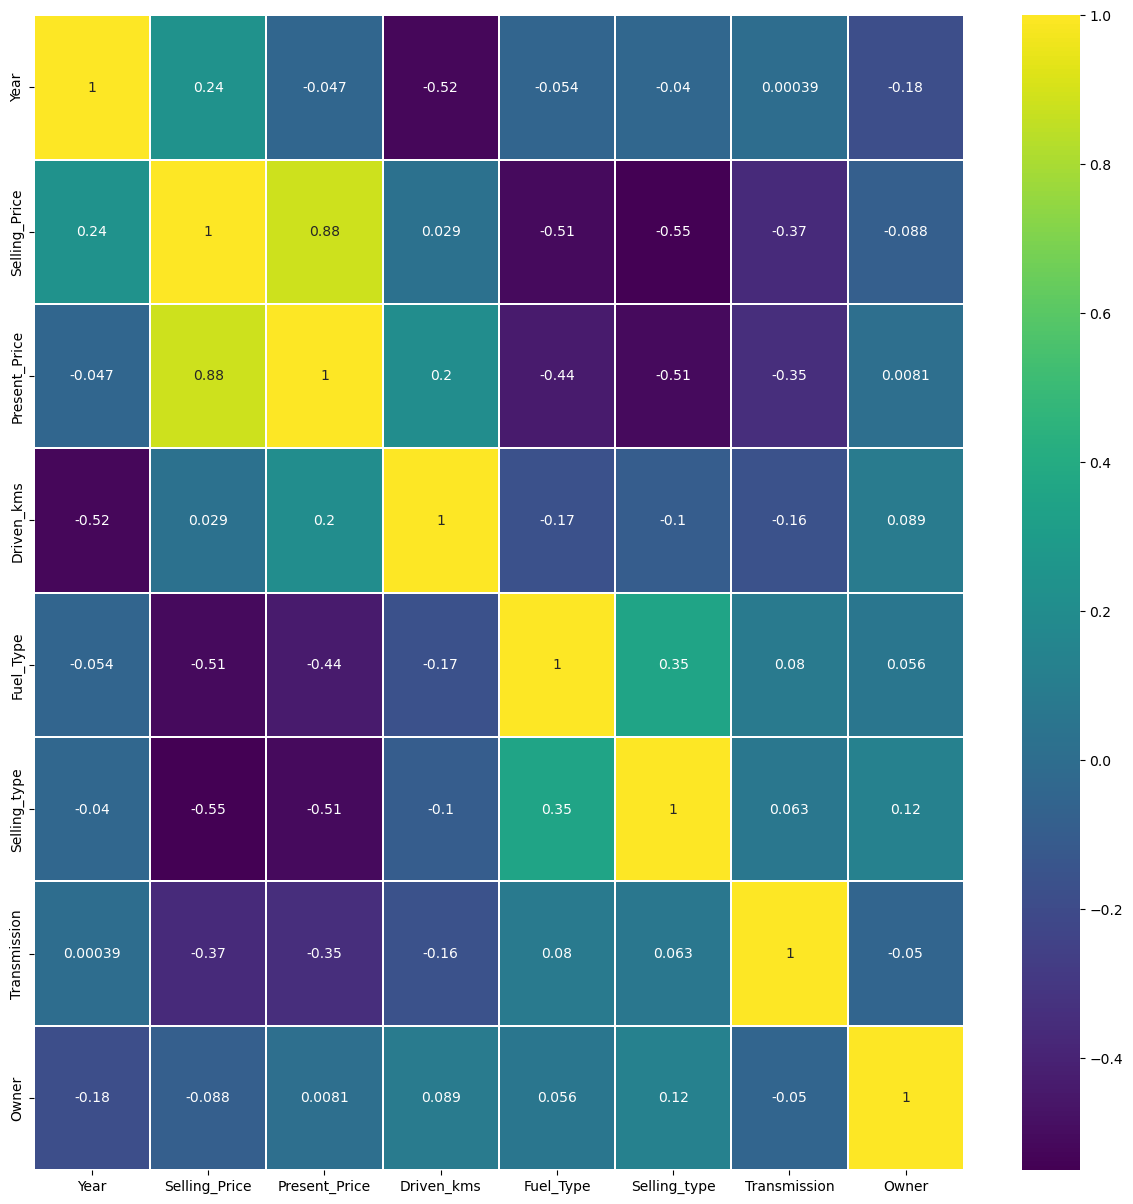

In [9]:
#Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=.2)

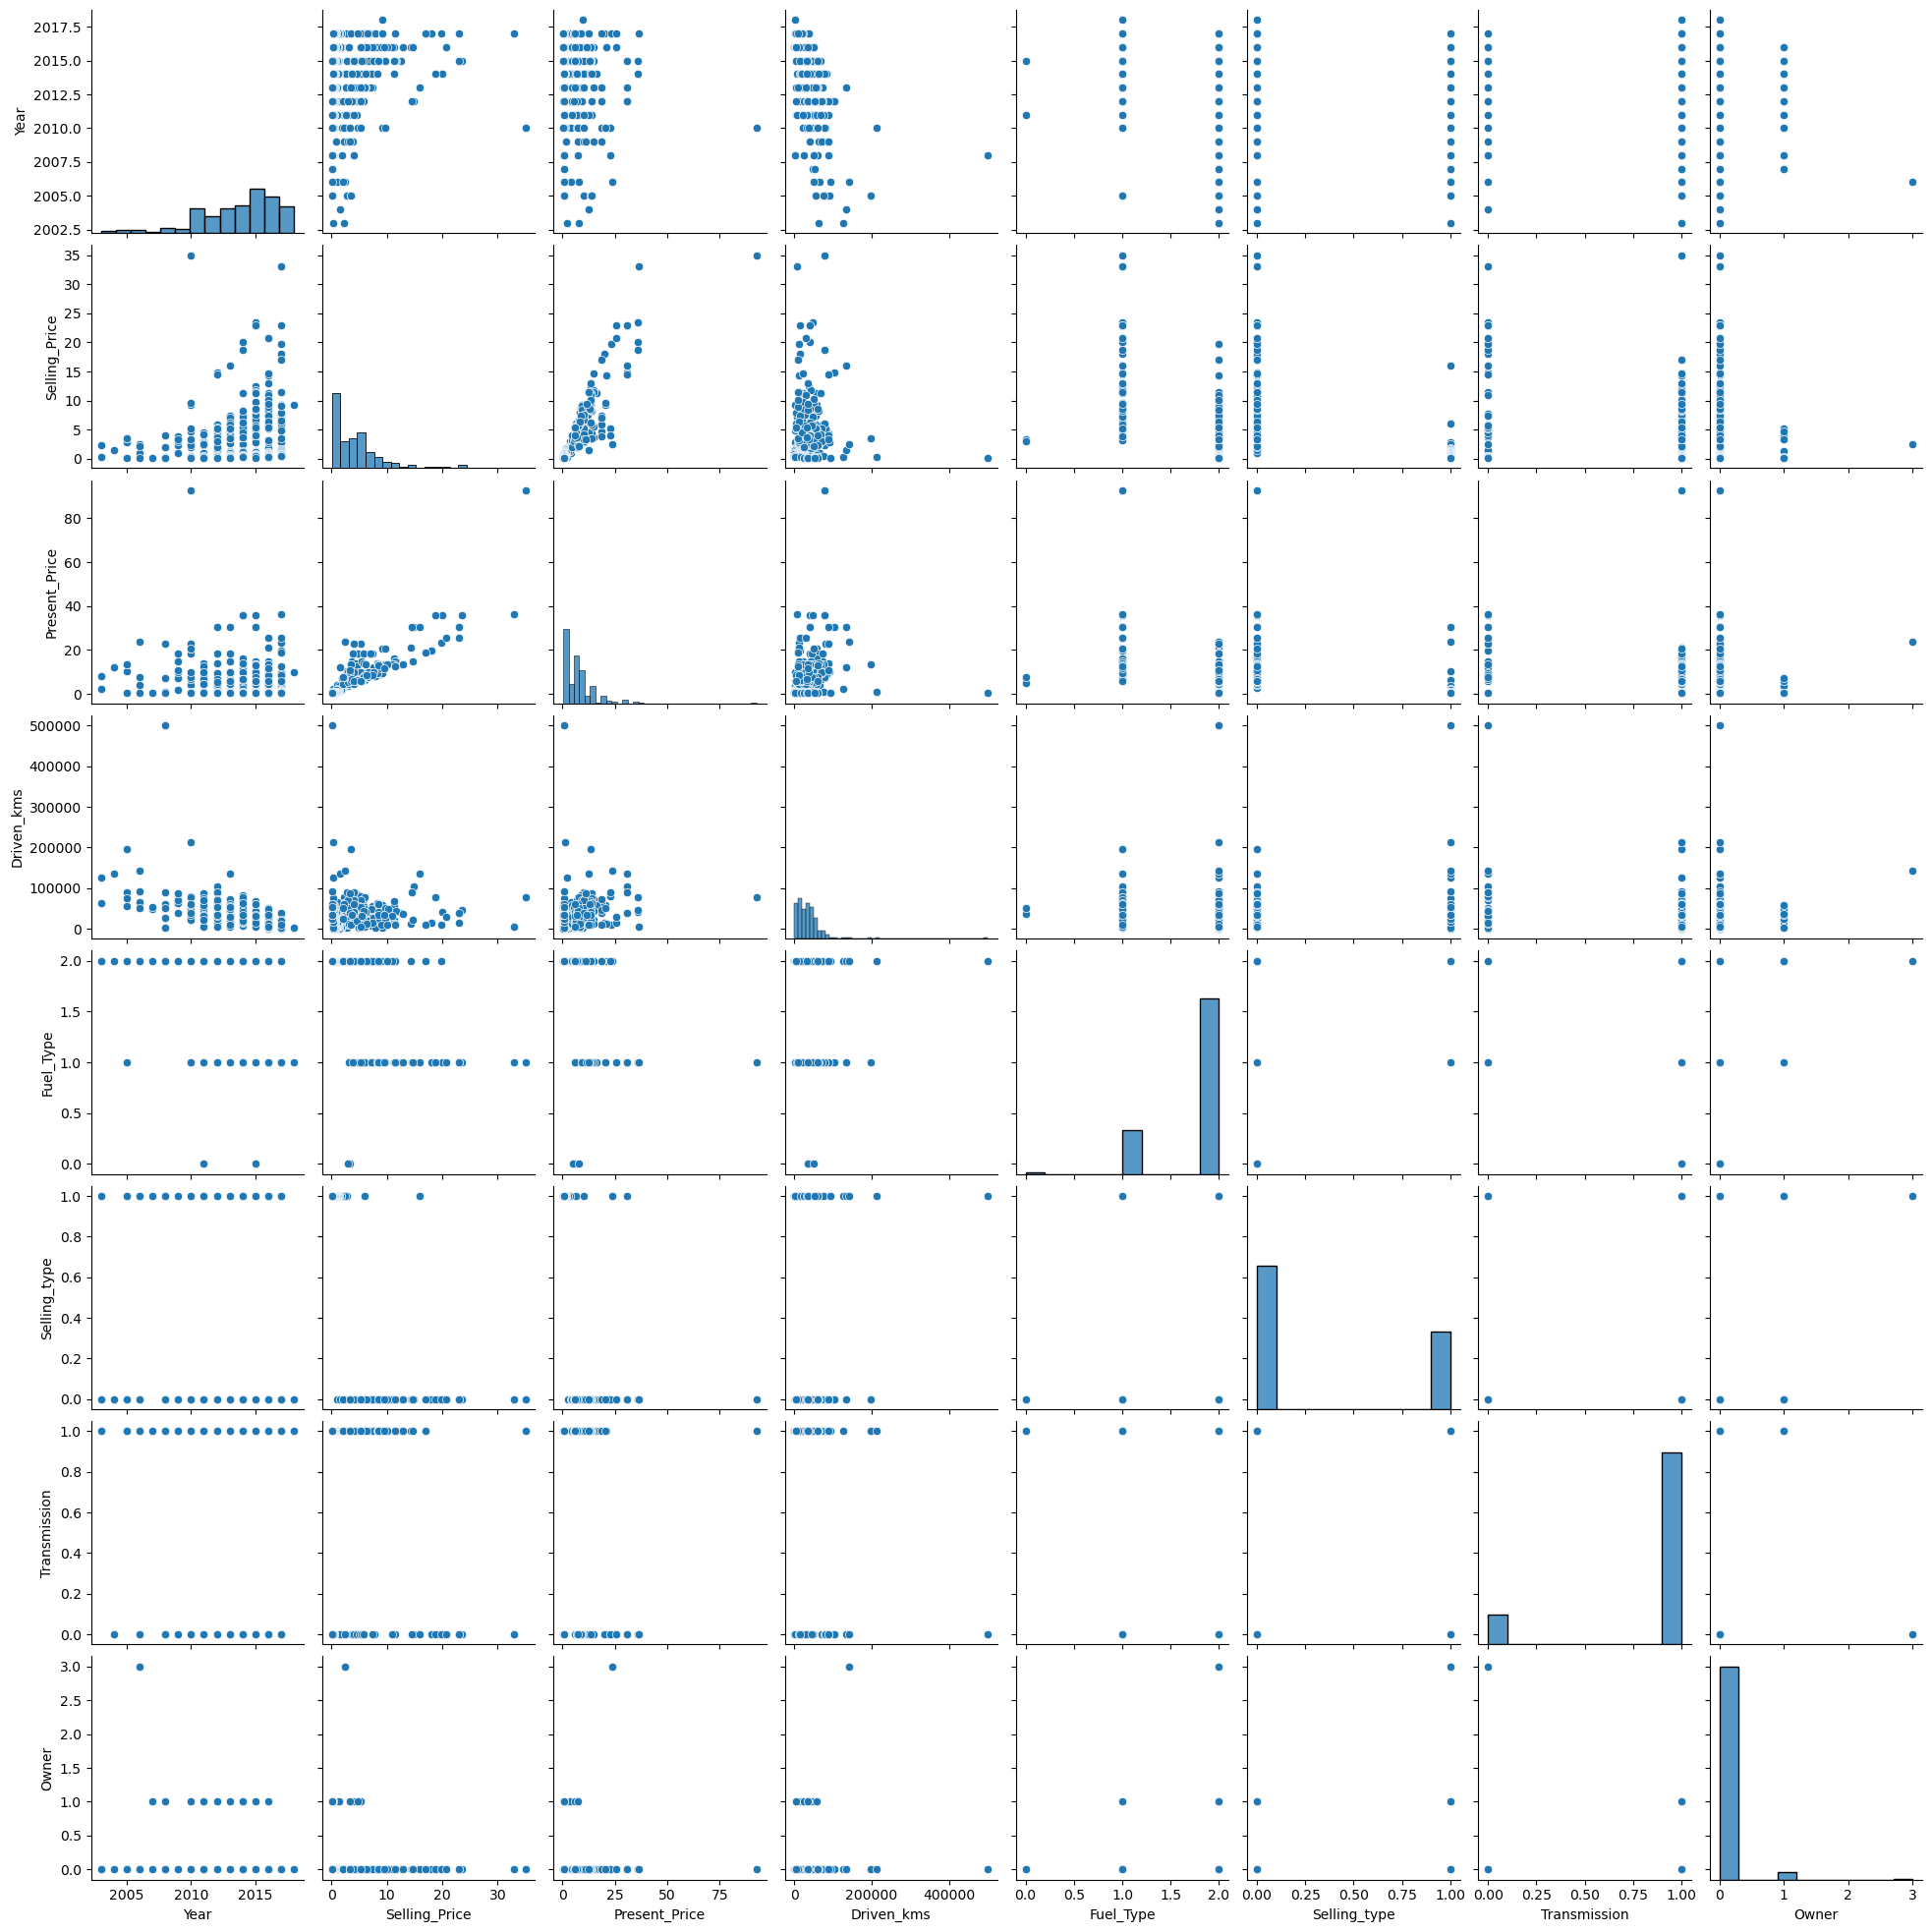

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Split features and target variable
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [13]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# Predictions on training and testing set
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

In [16]:
# Evaluate the model
print('Train MSE:', mean_squared_error(y_train, train_preds))
print('Test MSE:', mean_squared_error(y_test, test_preds))
print('Train R^2:', r2_score(y_train, train_preds))
print('Test R^2:', r2_score(y_test, test_preds))

Train MSE: 3.075783149502657
Test MSE: 3.5315798889712546
Train R^2: 0.883656370332929
Test R^2: 0.8466902419662691
